In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [5]:
# Load CocaCola Sales data
cocacola_data = pd.read_csv('/Users/yeshwanthsatyadev/Desktop/CocaCola_Sales_Rawdata.csv')

In [13]:
# Extract Quarter and Year information
quarter_year = cocacola_data['Quarter'].str.extract(r'Q(\d)_(\d+)')
cocacola_data['Year'] = '19' + quarter_year[1]
cocacola_data['Quarter'] = 'Q' + quarter_year[0]

In [14]:
# Create a new column combining Year and Quarter
cocacola_data['YearQuarter'] = cocacola_data['Year'] + cocacola_data['Quarter']

In [15]:
# Convert to datetime
cocacola_data['YearQuarter'] = pd.to_datetime(cocacola_data['YearQuarter'], format='%YQ%m')

In [16]:
# Set YearQuarter as index
cocacola_data.set_index('YearQuarter', inplace=True)

In [17]:
# Train-test split
train_size = int(len(cocacola_data) * 0.8)
train, test = cocacola_data[0:train_size], cocacola_data[train_size:]

In [22]:
# Fit SARIMA model
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 4)  # (P, D, Q, S)
model = SARIMAX(train['Sales'], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
model_fit = model.fit(disp=False)

/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
# Forecast
forecast = model_fit.get_forecast(steps=len(test))
predicted_values = forecast.predicted_mean

/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yeshwanthsatyadev/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [24]:
# Evaluate the model
mse = mean_squared_error(test['Sales'], predicted_values)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 488.8455287894994


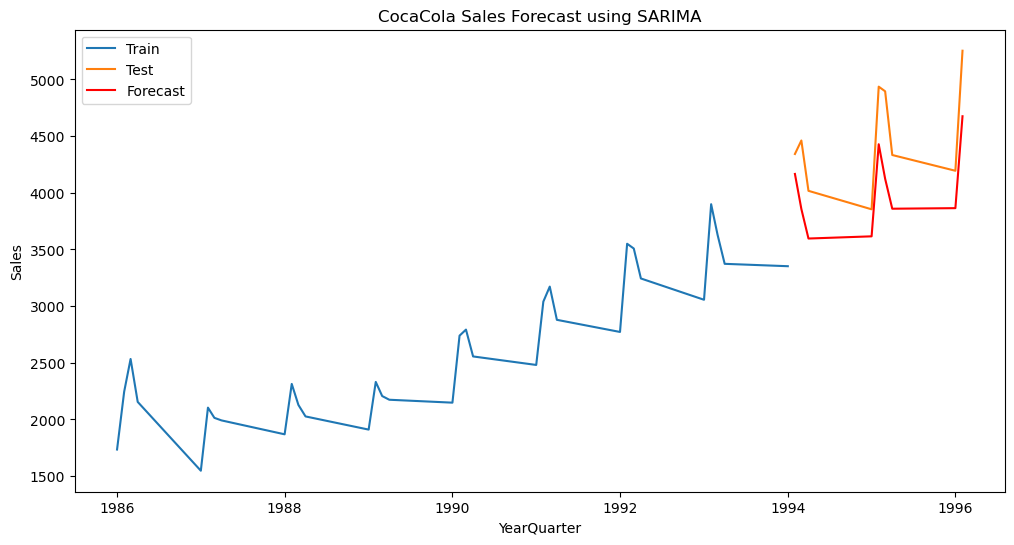

In [25]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Sales'], label='Train')
plt.plot(test.index, test['Sales'], label='Test')
plt.plot(test.index, predicted_values, label='Forecast', color='red')
plt.title('CocaCola Sales Forecast using SARIMA')
plt.xlabel('YearQuarter')
plt.ylabel('Sales')
plt.legend()
plt.show()